<a href="https://colab.research.google.com/github/markiroberts/gogglecolab01/blob/main/02Classification_MLP_for_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib as plt

# Check PyTorch Version
torch.__version__

'2.1.0+cu121'

In [2]:
def plot_predictions(xtrain, ytrain, xtest, ytest, predictions=None):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(xtrain, ytrain,  c="b", s=4,   marker=".", label="Training data")
  plt.pyplot.scatter(xtest,  ytest,   c="g", s=4,  marker=".", label="Testing data")
  if predictions is not None:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions:{len(predictions)}"
    plt.pyplot.scatter(xtest, predictions,   c="r", s=4,  marker=".", label="Predictions")
  else:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions: None"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [3]:
def plot_loss(epochlist, train_losslist, test_losslist):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(epochlist, train_losslist,  c="b", s=4,   marker=".", label="Training")
  plt.pyplot.scatter(epochlist, test_losslist,   c="r", s=4,   marker=".", label="Test")
  titletext = f"Loss vs. Epoch"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [165]:
def show_model(themodel):
  for x in themodel.state_dict().items():
    for y in x:
      print (y, sep=" ", end="")
      print("\t", end="")
    print (" ")

In [166]:
def digitText(output):
  max_output = -9999
  max_output_dig = None

  for dig in range(10):
    if output[dig] > max_output:
      max_output = output[dig]
      max_output_dig = dig

  return(max_output_dig)

In [126]:
def get_accuracy()  :# test model
  identifyDigit_model02.eval()
  test_correct = 0
  test_count = 0
  with torch.inference_mode():
    for c in range(len(X_test)):
      x = X_test[c]
      y = y_test[c]
      output_test = identifyDigit_model02(x)
      target_text = digitText(y)
      output_test_text = digitText(output_test)
  #    print(c, output_test_text, target_text)
      if output_test_text == target_text:
        test_correct = test_correct + 1
      test_count = test_count + 1

    train_correct = 0
    train_count = 0
    for c in range(len(X_train)):
      x = X_train[c]
      y = y_train[c]
      output = identifyDigit_model02(x)
      target_text = digitText(y)
      output_text = digitText(output)
      if output_text == target_text:
        train_correct = train_correct + 1
      train_count = train_count + 1

    train_accurracy = 100.0 * train_correct / train_count
    test_accurracy = 100.0 * test_correct / test_count
    string = f"Accuracy: {train_accurracy:.1f}%, Test Accuracy: {test_accurracy:.1f}%"
    return(string)
#    f"{number:.1f}
 #   print(f"output_test: {output_test}")
 #   print(f"output_test_text: {output_test_text}")
 #   print(f"Correct:{y}")
 #   print("")

Accuracy: 100.0%, Test Accuracy: 92.2%


##Create device-agnostic code

This means if we've got access to a GPU, our code will use

In [5]:
# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Device: {device}")

Device: cuda


<Figure size 640x480 with 0 Axes>

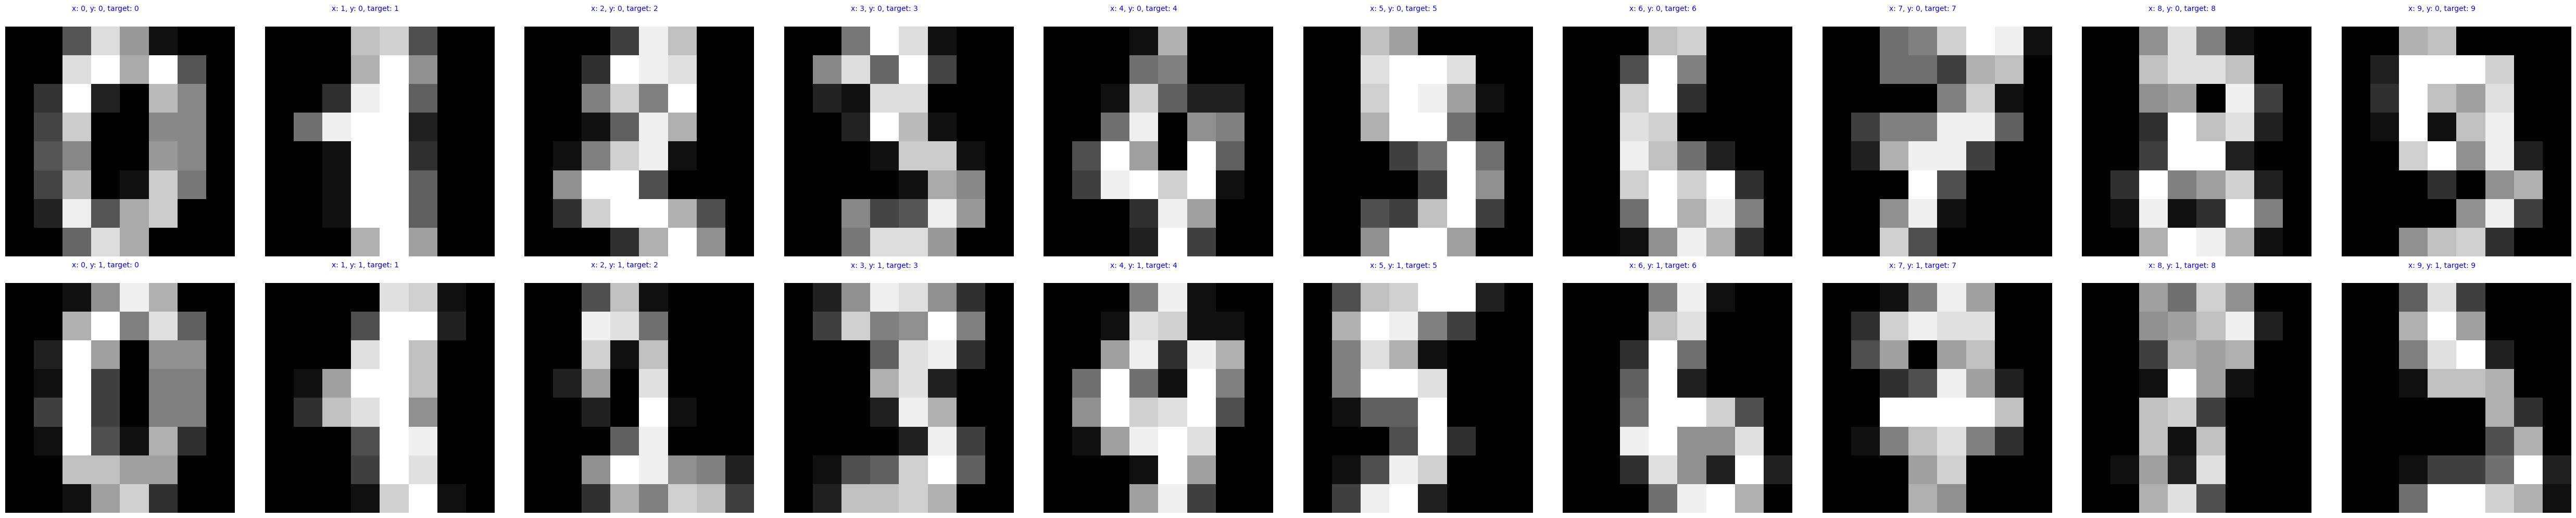

<function Bunch.items>

In [34]:
from sklearn.datasets import load_digits

digits = load_digits()
import matplotlib.pyplot as plt
plt.close('all')
plt.gray()
plt.tight_layout(pad=None, h_pad=None, w_pad=None, rect=None)
label_right = 3.0
label_top = -1.0

max_width = 10
max_height = 2
max_count = max_width * max_height

fig, axs = plt.subplots(max_height,max_width,figsize=(5 * max_width, 5 * max_height))
fig.tight_layout()

for digit in range(max_count):
  x = digit % max_width
  y = int(digit / max_width)
  axs[y,x].matshow(digits.images[digit])
  title_string = f"x: {x}, y: {y}, target: {digits.target[digit]}"
  axs[y,x].text(
        label_right, label_top,
        title_string,
        c="blue",
        horizontalalignment='center',
        verticalalignment='bottom')

  axs[y,x].set_xlabel(None)
  axs[y,x].set_ylabel(None)
  axs[y,x].set_axis_off()

plt.show()
digits.items


In [162]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib as plt
#from sklearn.datasets import load_digits

# Check PyTorch Version
torch.__version__

# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Device: {device}")

# Get training data
digits = load_digits()

print("Digits", len(digits.target))

targets = torch.zeros([len(digits.target),10], dtype=torch.float32)

for y in range(len(digits.target)):
  for x in range(10):
    if x == digits.target[y]:
      targets[y,x] = 1
    else:
      targets[y,x] = 0

# Create training set
train_split = int(0.8 * len(digits.data))
X_all, y_all = digits.data, targets
X_train, y_train = digits.data[:train_split], targets[:train_split]
X_test, y_test   = digits.data[train_split:], targets[train_split:]

X_train = torch.tensor(X_train, dtype=torch.float32).clone().requires_grad_(True).to(device)
y_train = y_train.clone().detach().requires_grad_(True).to(device)
X_all   = torch.tensor(X_all,   dtype=torch.float32).clone().requires_grad_(True).to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device).clone().detach()
y_test = y_test.clone().detach().requires_grad_(True).to(device)
y_all  = y_all.clone().detach().requires_grad_(True).to(device)

class identifyDigit(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 64,  out_features= 27)
        self.activation_1 = nn.ReLU()
        self.layer_2 = nn.Linear(in_features = 27,  out_features= 15)
        self.activation_2 = nn.ReLU()
        self.layer_3 = nn.Linear(in_features = 15,  out_features= 10)

    def forward(self, x):
      l1 = self.layer_1(x)
      activation_1 = self.activation_1(l1)

      l2 = self.layer_2(activation_1)
      activation_2 = self.activation_2(l2)

      l3 = self.layer_3(activation_2)
      return (l3)



Device: cuda
Digits 1797


In [164]:
inputDim = 64       # takes 64 pixel input
outputDim = 10      # identifies digit 0 - 9
learningRate = 0.05
epochs = 10000
outputfunction = nn.LogSoftmax(dim = 1)
pos_weight = torch.ones([10]).to(device)
identifyDigit_model02 = identifyDigit().to(device)
y_train_softmax = outputfunction(y_train).to(device)
y_test_softmax  = outputfunction(y_test).to(device)
#X_train.requires_grad=True

#criterion = torch.nn.MSELoss()
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.SGD(identifyDigit_model02.parameters(), lr=learningRate)

loss_list = []
test_loss_list = []
epoch_list = []

for epoch in range(epochs):
  # Training mode
  identifyDigit_model02.train()

  # get output from the model, given the inputs
  y_logits = identifyDigit_model02(X_train)

  # get loss for the predicted output
  loss = criterion(y_logits, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Back propagation
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  # test model
  identifyDigit_model02.eval()
  with torch.inference_mode():
    y_test_logits = identifyDigit_model02(X_test)
#    output_test_softmax = outputfunction(output_test)

    # get loss for the predicted output
    loss_test = criterion(y_test_logits, y_test)

    epoch_list.append(epoch)
    loss_list.append(loss.item())
    test_loss_list.append(loss_test.item())

    if (epoch % int(epochs/10) == 0):
      accuracy_string = get_accuracy()
      print (f"Epoch: {epoch}, Loss: {loss.item():.4f}, Loss Test: {loss_test.item():.4f}, {accuracy_string}")

Epoch: 0, Loss: 0.6818, Loss Test: 0.6558, Accuracy: 10.0%, Test Accuracy: 13.1%
Epoch: 1000, Loss: 0.0434, Loss Test: 0.0992, Accuracy: 96.6%, Test Accuracy: 85.6%
Epoch: 2000, Loss: 0.0223, Loss Test: 0.0913, Accuracy: 98.3%, Test Accuracy: 88.1%
Epoch: 3000, Loss: 0.0139, Loss Test: 0.0881, Accuracy: 99.1%, Test Accuracy: 88.3%
Epoch: 4000, Loss: 0.0096, Loss Test: 0.0873, Accuracy: 99.5%, Test Accuracy: 89.7%
Epoch: 5000, Loss: 0.0069, Loss Test: 0.0883, Accuracy: 99.7%, Test Accuracy: 90.0%
Epoch: 6000, Loss: 0.0051, Loss Test: 0.0908, Accuracy: 99.8%, Test Accuracy: 90.6%
Epoch: 7000, Loss: 0.0038, Loss Test: 0.0937, Accuracy: 100.0%, Test Accuracy: 90.6%
Epoch: 8000, Loss: 0.0029, Loss Test: 0.0964, Accuracy: 100.0%, Test Accuracy: 90.6%
Epoch: 9000, Loss: 0.0023, Loss Test: 0.0988, Accuracy: 100.0%, Test Accuracy: 90.6%


<Figure size 640x480 with 0 Axes>

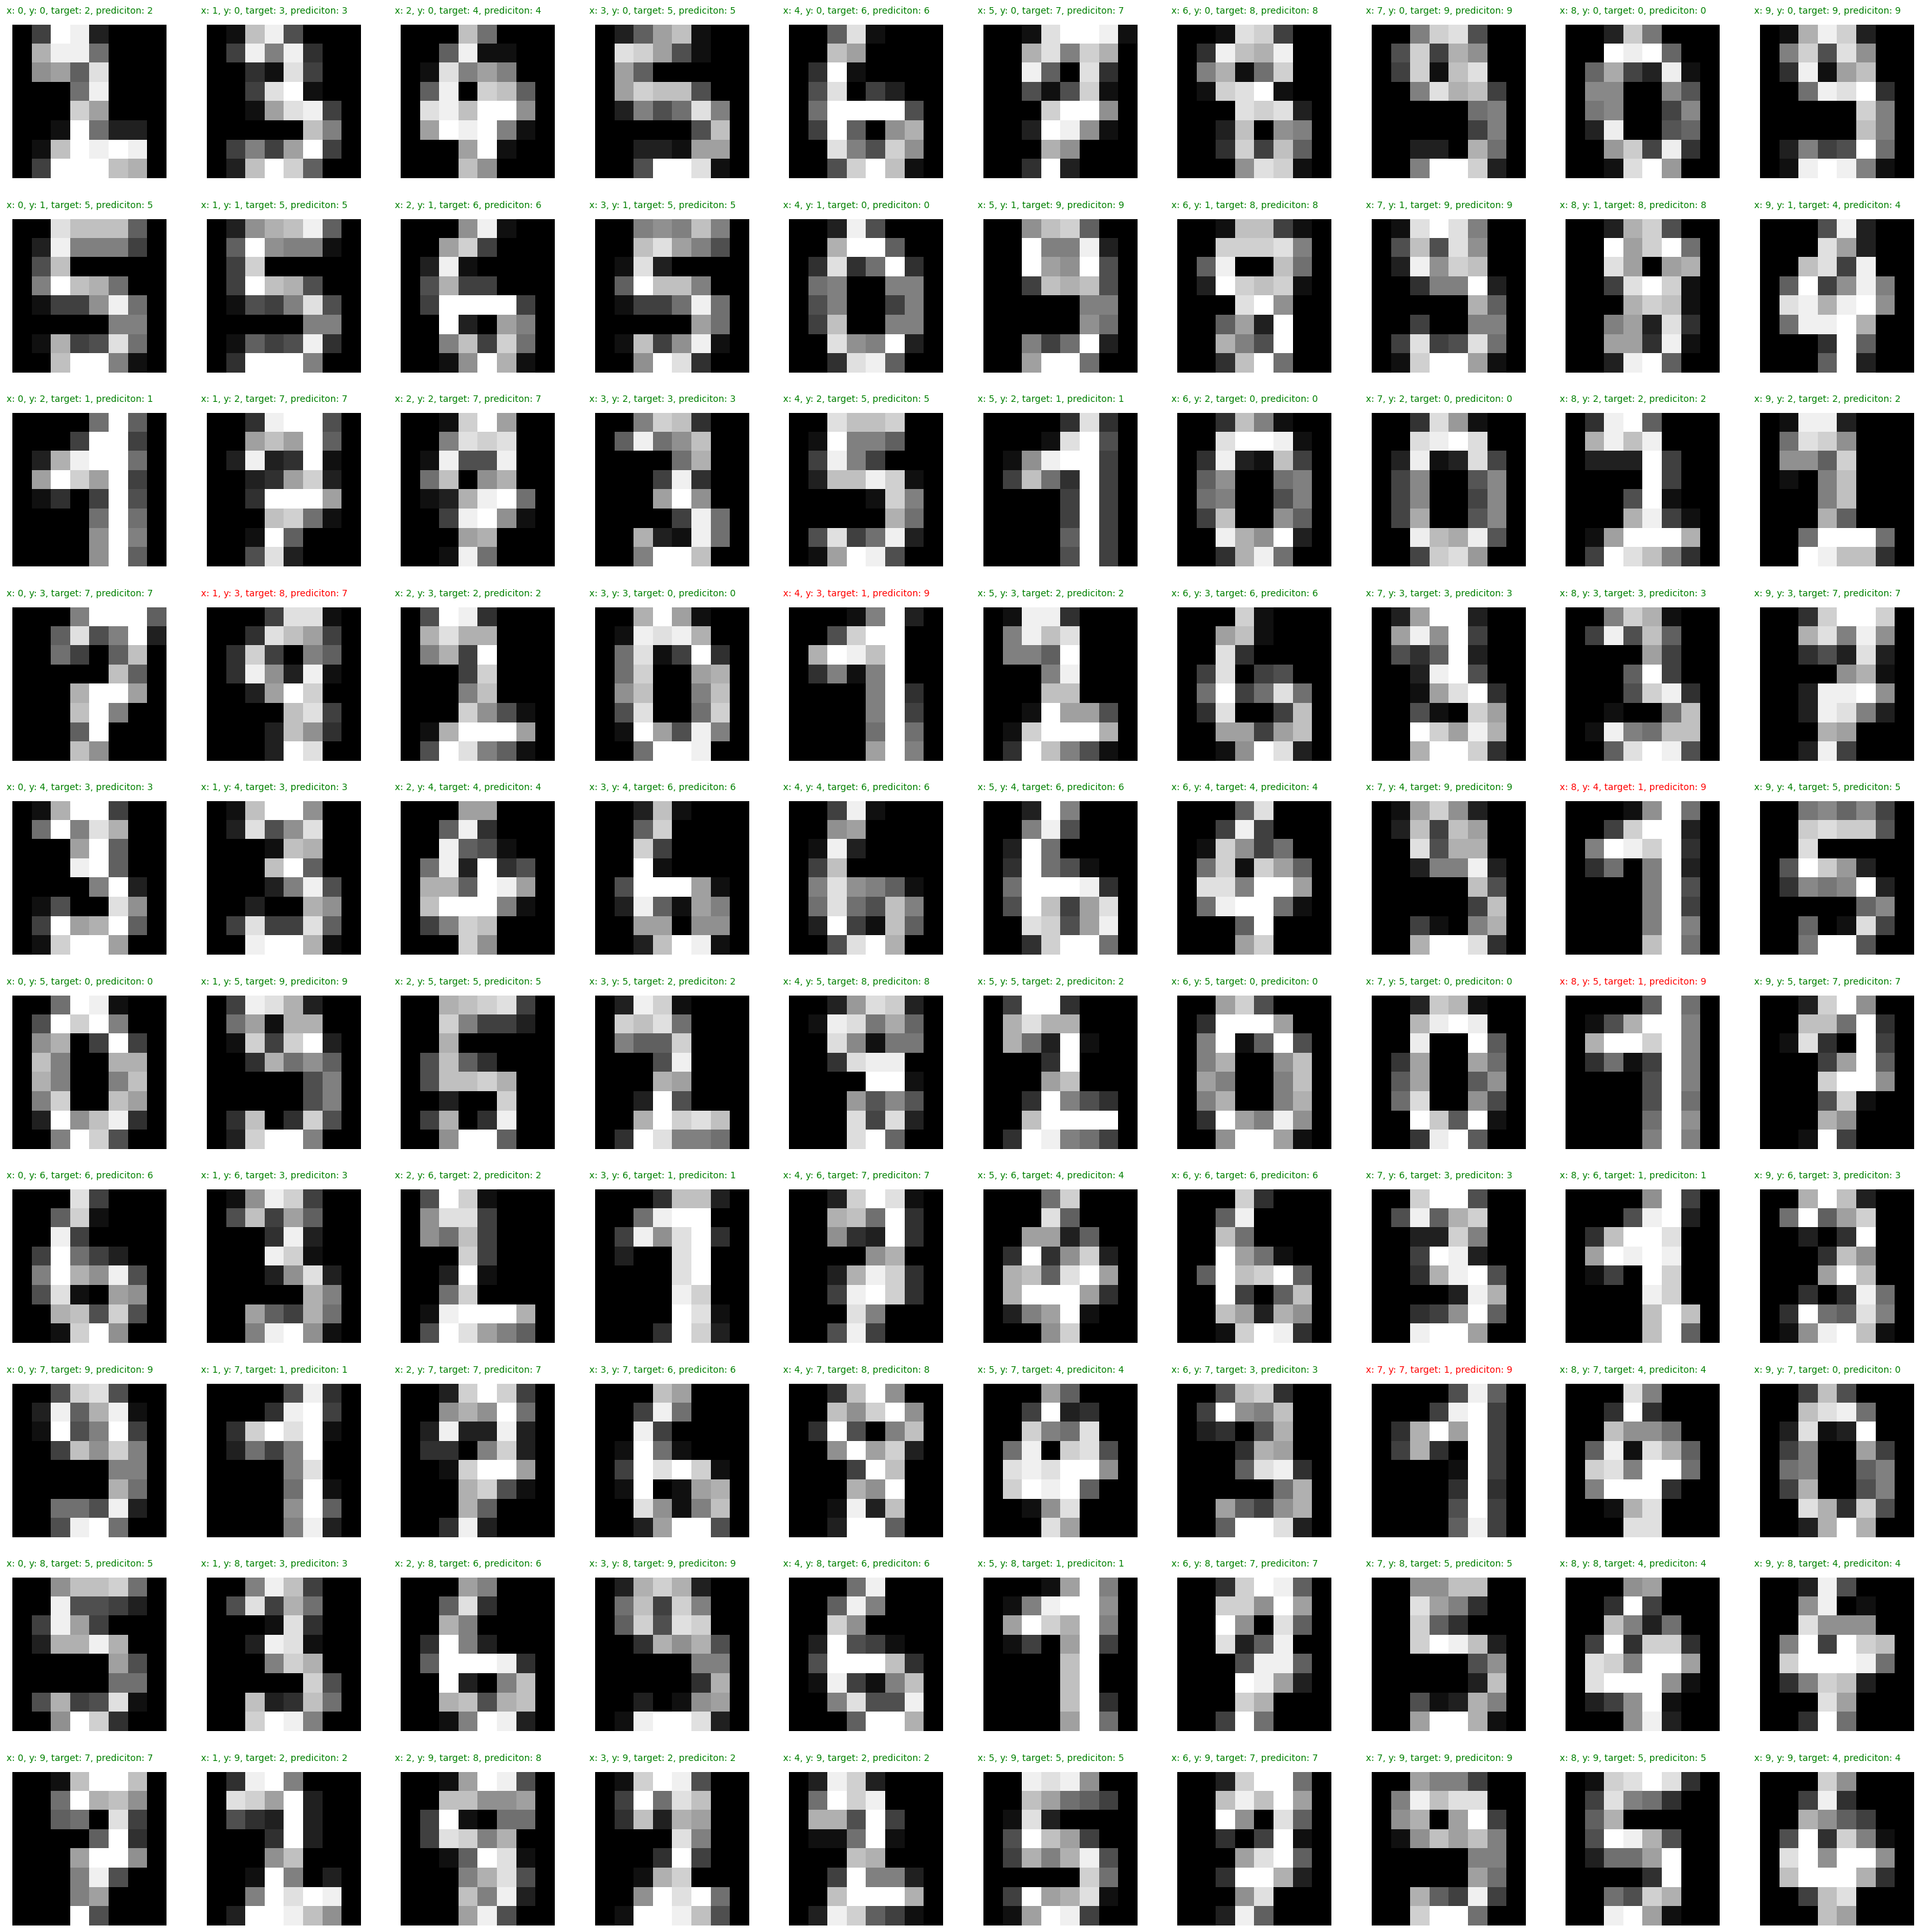

<function Bunch.items>

In [167]:
from sklearn.datasets import load_digits

#digits = load_digits()
import matplotlib.pyplot as plt
plt.close('all')
plt.gray()
plt.tight_layout(pad=None, h_pad=None, w_pad=None, rect=None)
label_right = 3.0
label_top = -1.0

max_width = 10
max_height = 10
max_count = max_width * max_height

fig, axs = plt.subplots(max_height,max_width,figsize=(3 * max_width, 3 * max_height))
fig.tight_layout()

identifyDigit_model02.eval()
with torch.no_grad():
  for digit in range(max_count):
    x = digit % max_width
    y = int(digit / max_width)
    axs[y,x].matshow(digits.images[digit+train_split])
    input = torch.tensor(digits.data[digit+train_split], dtype=torch.float32).to(device)
    output = identifyDigit_model02(input)
    prediciton = digitText(output)

    title_string = f"x: {x}, y: {y}, target: {digits.target[digit+train_split]}, prediciton: {prediciton}"
    if prediciton == digits.target[digit+train_split]:
      col = "green"
    else:
      col = "red"
    axs[y,x].text(
          label_right, label_top,
          title_string,
          c=col,
          horizontalalignment='center',
          verticalalignment='bottom')

    axs[y,x].set_xlabel(None)
    axs[y,x].set_ylabel(None)
    axs[y,x].set_axis_off()

plt.show()
digits.items


